In [2]:
import torch
import torchvision 
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np 
from torch.utils.data import Dataset , DataLoader
import torch.optim as optim 
import torch.nn as nn 


In [3]:
train_set = torchvision.datasets.MNIST(root = './data/MNIST', download = True,
                                              train = True, transform = transforms.Compose([transforms.ToTensor(),]))

test_set = torchvision.datasets.MNIST(root = './data/MNIST', download=True,
                                             train=False, transform = transforms.Compose([transforms.ToTensor()]))


100%|█████████████████████████████████████████████████████████████████████████████| 9.91M/9.91M [00:03<00:00, 2.49MB/s]
100%|██████████████████████████████████████████████████████████████████████████████| 28.9k/28.9k [00:00<00:00, 322kB/s]
100%|█████████████████████████████████████████████████████████████████████████████| 1.65M/1.65M [00:01<00:00, 1.36MB/s]
100%|█████████████████████████████████████████████████████████████████████████████| 4.54k/4.54k [00:00<00:00, 2.24MB/s]


In [5]:
train_loader = DataLoader(train_set,batch_size = 20)
test_loader = DataLoader(test_set,batch_size = 60000)

In [8]:
# visualizing the dataset 

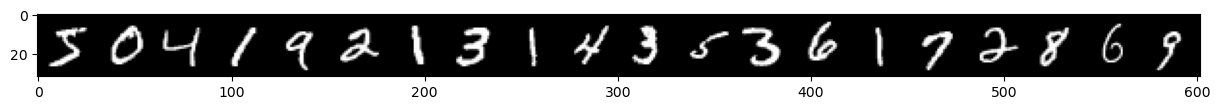

In [10]:
images, labels = next(iter(train_loader))

    #used to create a grid of images
grid = torchvision.utils.make_grid(images,nrow=20)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid,(1,2,0)),cmap='gray')

In [23]:
class NeuralNetwork(nn.Module):

    def __init__(self):
        super(NeuralNetwork,self).__init__()
        self.flatten  = nn.Flatten()
        self.Linear_relu_stack= nn.Sequential(
            nn.Linear(28 * 28 ,512),
            nn.ReLU(),
            nn.Linear(512,512),
            nn.ReLU(),
            nn.Linear(512,10),
        )

    def forward(self,x):
        x = self.flatten(x)
        logits = self.Linear_relu_stack(x)
        
        return logits
            
    

In [24]:
model = NeuralNetwork()

In [33]:
learning_rate = 0.005
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)
criterion  = nn.CrossEntropyLoss()
epochs = 10

In [34]:
losses = []
for i in range(epochs):
    for j, (images,targets) in enumerate(train_loader):
        y_pred = model(images)

        loss = criterion(y_pred,targets.reshape(-1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if i > 10:
        optimizer.lr = 0.0005
    print(loss)
    losses.append(loss)
    print('Complete Training')
        

tensor(0.0223, grad_fn=<NllLossBackward0>)
Complete Training
tensor(0.0206, grad_fn=<NllLossBackward0>)
Complete Training
tensor(0.0192, grad_fn=<NllLossBackward0>)
Complete Training
tensor(0.0179, grad_fn=<NllLossBackward0>)
Complete Training
tensor(0.0166, grad_fn=<NllLossBackward0>)
Complete Training
tensor(0.0155, grad_fn=<NllLossBackward0>)
Complete Training
tensor(0.0144, grad_fn=<NllLossBackward0>)
Complete Training
tensor(0.0133, grad_fn=<NllLossBackward0>)
Complete Training
tensor(0.0124, grad_fn=<NllLossBackward0>)
Complete Training
tensor(0.0115, grad_fn=<NllLossBackward0>)
Complete Training


Random Index: 1575


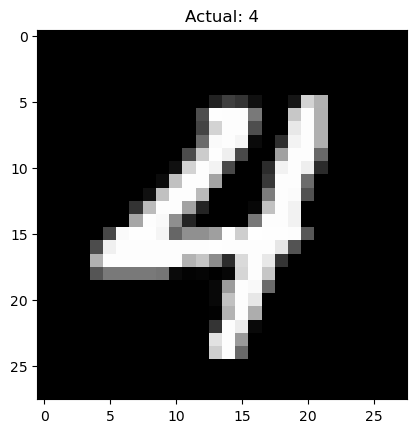

Predicted: 4


In [35]:
import random
import torch
import matplotlib.pyplot as plt

# Pick a random sample index from the test batch
rand_no = random.randint(0,10000)  # Ensure it's within batch size
print("Random Index:", rand_no)

# Get a batch of test data
x_test, y_test = next(iter(test_loader))  

# Make predictions for the entire batch
y_pred = model(x_test).argmax(dim=1)

# Define MNIST class labels (digits 0-9)
label_list = [str(i) for i in range(10)]  # ['0', '1', '2', ..., '9']

# Show the randomly selected image
plt.imshow(x_test[rand_no].squeeze(), cmap='gray')  # Remove extra dimension for display
plt.title(f"Actual: {label_list[y_test[rand_no].item()]}")
plt.show()

# Predict for a single image
pred = model(x_test[rand_no].unsqueeze(0)).argmax().item()

# Print prediction
print(f"Predicted: {label_list[pred]}")


In [36]:
# compute the accuracy of the model

print("Accuracy is : ",(y_pred.eq(y_test).sum()/10000.).item()*100,"%")

Accuracy is :  97.61000275611877 %
